## Predicting Bigg Boss Malayalam (ബിഗ് ബോസ് മലയാളം) Season 3 Winner





## Dataset https://www.kaggle.com/thirumani/bigg-boss-india-hindi-telugu-tamil-kannada

In [1]:
import datetime
print("Notebook was last executed on:", datetime.date.today())

Notebook was last executed on: 2021-06-24


### Importing Required Python Libraries

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix,roc_curve,auc
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

### Check and import dataset

In [3]:
!cd /kaggle/input/bigg-boss-india-hindi-telugu-tamil-kannada; ls -tlr

total 84
-rw-r--r-- 1 nobody nogroup 84059 Jun 24 12:17 Bigg_Boss_India.csv


In [4]:
bigg_boss = pd.read_csv('/kaggle/input/bigg-boss-india-hindi-telugu-tamil-kannada/Bigg_Boss_India.csv', encoding = "ISO-8859-1")
nRow, nCol = bigg_boss.shape
print(f'\nThere are {nRow} rows and {nCol} columns')


There are 670 rows and 24 columns


## Exploratory Data Analysis (EDA)

In [5]:
bigg_boss.head(5)

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
0,Hindi,1,Amit Sadh,Soap Actor,Male,03-Nov-06,NaN,10.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,NaN,0,Sony TV,2.72,3.0,0.0,0.0,NaN,0.0,0.0
1,Hindi,1,Anupama Verma,Model,Female,03-Nov-06,NaN,5.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,NaN,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0,0.0
2,Hindi,1,Aryan Vaid,Pageant Winner,Male,03-Nov-06,NaN,4.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,NaN,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0,0.0
3,Hindi,1,Bobby Darling,LGBT,Transgender,03-Nov-06,NaN,1.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,NaN,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0,0.0
4,Hindi,1,Carol Gracias,Model,Female,03-Nov-06,26-Jan-07,12.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,NaN,0,Sony TV,2.72,6.0,0.0,0.0,NaN,1.0,0.0


In [6]:
bigg_boss.tail(10).T

,660,661,662,663,664,665,666,667,668,669
Language,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam
Season Number,3,3,3,3,3,3,3,3,3,3
Name,Noby Marcose,Ramzan Muhammed,Rithu Manthra,Sai Vishnu,Sandhya Manoj,Soorya Menon,Firoz Khan & Sajna Firoz,Michelle Ann Daniel,Angel Thomas,Remya Panickar
Profession,Actor,Dancer,Singer,Commoner,Dancer,Model,Actor & Actress,Actress,Model,Actress
Gender,Male,Male,Female,Male,Female,Female,Male & Female,Female,Female,Female
Entry Date,14-Feb-21,14-Feb-21,14-Feb-21,14-Feb-21,14-Feb-21,14-Feb-21,NaN,NaN,NaN,NaN
Elimination Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Elimination Week Number,NaN,NaN,NaN,NaN,10,13,9,3,4,13
Wild Card,No,No,No,No,No,No,Yes,Yes,Yes,Yes
Season Length,105,105,105,105,105,105,105,105,105,105


In [7]:
bigg_boss.sample(10)

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
522,Tamil,3,Sherin Shringar,Actress,Female,23-Jun-19,NaN,15.0,No,105,17,23-Jun-19,06-Oct-19,Kamal Haasan,NaN,0,Star Vijay,8.80,6.0,0.0,1.0,5.0,1.0,0.0
449,Telugu,3,Siva Jyothi,TV Anchor,Female,21-Jul-19,27-Oct-19,14.0,No,105,17,21-Jul-19,03-Nov-19,Nagarjuna,Ramya Krishnan,0,Star Maa,NaN,4.0,0.0,1.0,NaN,0.0,0.0
32,Hindi,3,Claudia Ciesla,Model,Female,04-Oct-09,NaN,9.0,No,84,15,04-Oct-09,26-Dec-09,Amitabh Bachchan,NaN,0,Colors,2.83,2.0,0.0,0.0,NaN,0.0,0.0
606,Bengali,2,Srabanti Banerjee,Actress,Female,04-Apr-16,NaN,NaN,No,97,16,04-Apr-16,15-Jul-16,Mithun Chakraborthy,NaN,0,Colors Bangla,6.50,1.0,0.0,0.0,NaN,0.0,0.0
368,Kannada,7,Chandana Ananthakrishna,Actress,Female,13-Oct-19,05-Jan-20,12.0,No,113,20,13-Oct-19,02-Feb-20,Sudeep,NaN,0,Colors Kannada,NaN,4.0,0.0,1.0,NaN,0.0,0.0
175,Hindi,11,Akash Anil Dadlani,Singer,Male,01-Oct-17,NaN,15.0,No,106,19,01-Oct-17,14-Jan-18,Salman Khan,NaN,0,Colors,7.64,5.0,0.0,0.0,NaN,0.0,0.0
276,Kannada,2,Anupama Bhat,TV Anchor,Female,29-Jun-14,NaN,13.0,No,98,15,29-Jun-14,5-Oct-14,Sudeep,NaN,0,Suvarna,NaN,7.0,0.0,0.0,NaN,0.0,0.0
355,Kannada,6,Nayana Puttaswamy,Actress,Female,21-Oct-18,NaN,8.0,No,100,20,21-Oct-18,27-Jan-19,Sudeep,NaN,0,Colors Kannada,NaN,4.0,0.0,0.0,NaN,0.0,0.0
577,Marathi,2,Vidyadhar (Bappa) Joshi,Actor,Male,26-May-19,NaN,4.0,No,98,17,26-May-19,01-Sep-19,Mahesh Manjrekar,NaN,0,Colors Marathi,NaN,1.0,0.0,0.0,NaN,0.0,0.0
226,Hindi,13,Siddhartha Dey,Writer,Male,29-Sep-19,NaN,5.0,No,140,22,29-Sep-19,15-Feb-20,Salman Khan,NaN,0,Colors,9.06,3.0,0.0,0.0,NaN,0.0,0.0


In [8]:
bigg_boss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 24 columns):
Language                              670 non-null object
Season Number                         670 non-null int64
Name                                  670 non-null object
Profession                            670 non-null object
Gender                                670 non-null object
Entry Date                            564 non-null object
Elimination Date                      134 non-null object
Elimination Week Number               550 non-null float64
Wild Card                             670 non-null object
Season Length                         670 non-null int64
Number of Housemates                  670 non-null int64
Season Start Date                     670 non-null object
Season End Date                       670 non-null object
Host Name                             670 non-null object
Guest Host Name                       73 non-null object
Prize Money (INR)           

In [9]:
bigg_boss.describe()

,Season Number,Elimination Week Number,Season Length,Number of Housemates,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
count,670.000000,550.000000,670.000000,670.000000,394.000000,652.000000,652.000000,637.000000,86.000000,650.000000,650.000000
mean,4.949254,9.189091,102.585075,18.373134,6.230635,4.093558,0.098160,0.541601,6.593023,0.235385,0.052308
std,3.773932,4.830522,13.677726,2.092308,3.329713,2.918581,0.322523,0.756676,1.618844,0.424566,0.222818
min,1.000000,1.000000,70.000000,15.000000,2.720000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.000000,5.000000,98.000000,17.000000,3.770000,2.000000,0.000000,0.000000,5.250000,0.000000,0.000000
50%,4.000000,9.000000,105.000000,18.000000,4.950000,4.000000,0.000000,0.000000,7.000000,0.000000,0.000000
75%,7.000000,14.000000,105.000000,20.000000,8.200000,6.000000,0.000000,1.000000,8.000000,0.000000,0.000000
max,14.000000,20.000000,143.000000,23.000000,15.600000,17.000000,3.000000,5.000000,10.000000,1.000000,1.000000


In [10]:
bigg_boss['Season Start Date'] = pd.to_datetime(bigg_boss['Season Start Date'])
bigg_boss['Season End Date'] = pd.to_datetime(bigg_boss['Season End Date'])
bigg_boss['Entry Date'] = pd.to_datetime(bigg_boss['Entry Date'])
bigg_boss['Elimination Date'] = pd.to_datetime(bigg_boss['Elimination Date'])

In [11]:
bigg_boss['Finalist'] = bigg_boss['Finalist'].astype(pd.Int32Dtype())
bigg_boss['Elimination Week Number'] = bigg_boss['Elimination Week Number'].astype(pd.Int32Dtype())
bigg_boss['Number of Evictions Faced'] = bigg_boss['Number of Evictions Faced'].astype(pd.Int32Dtype())
bigg_boss['Number of re-entries'] = bigg_boss['Number of re-entries'].astype(pd.Int32Dtype())
bigg_boss['Number of times elected as Captain'] = bigg_boss['Number of times elected as Captain'].astype(pd.Int32Dtype())
bigg_boss['Social Media Popularity'] = bigg_boss['Social Media Popularity'].astype(pd.Int32Dtype())

bigg_boss['Prize Money (INR)'] = bigg_boss['Prize Money (INR)'].str.replace(',','')
bigg_boss['Prize Money (INR)'] = pd.to_numeric(bigg_boss['Prize Money (INR)'])

bigg_boss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 24 columns):
Language                              670 non-null object
Season Number                         670 non-null int64
Name                                  670 non-null object
Profession                            670 non-null object
Gender                                670 non-null object
Entry Date                            564 non-null datetime64[ns]
Elimination Date                      134 non-null datetime64[ns]
Elimination Week Number               550 non-null Int32
Wild Card                             670 non-null object
Season Length                         670 non-null int64
Number of Housemates                  670 non-null int64
Season Start Date                     670 non-null datetime64[ns]
Season End Date                       670 non-null datetime64[ns]
Host Name                             670 non-null object
Guest Host Name                       73 non-null objec

In [12]:
# Unique values in each column
for col in bigg_boss.columns:
    print("Number of unique values in", col,"-", bigg_boss[col].nunique())

Number of unique values in Language - 7
Number of unique values in Season Number - 14
Number of unique values in Name - 663
Number of unique values in Profession - 76
Number of unique values in Gender - 4
Number of unique values in Entry Date - 46
Number of unique values in Elimination Date - 75
Number of unique values in Elimination Week Number - 20
Number of unique values in Wild Card - 2
Number of unique values in Season Length - 15
Number of unique values in Number of Housemates - 8
Number of unique values in Season Start Date - 37
Number of unique values in Season End Date - 35
Number of unique values in Host Name - 12
Number of unique values in Guest Host Name - 4
Number of unique values in Prize Money (INR) - 9
Number of unique values in Broadcasted By - 11
Number of unique values in Average TRP - 21
Number of unique values in Number of Evictions Faced - 16
Number of unique values in Number of re-entries - 4
Number of unique values in Number of times elected as Captain - 6
Numbe

In [13]:
# Number of seasons in all Indian languages
print(bigg_boss.groupby('Language')['Season Number'].nunique().sum())

# 37 seasons happened (including current seasons)

37


## Bigg Boss Hindi has many seasons compared to other Indian languages. So, the number of housemates are more in Hindi.

In [14]:
# Number of seasons in each Indian language
print(bigg_boss.groupby('Language')['Season Number'].nunique().nlargest(10))

Language
Hindi        14
Kannada       8
Tamil         4
Telugu        4
Malayalam     3
Bengali       2
Marathi       2
Name: Season Number, dtype: int64


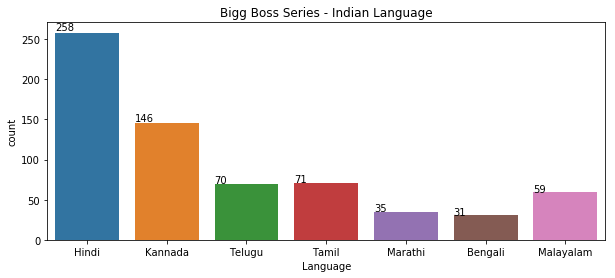

In [15]:
# Total number of Bigg Boss housemates
fig = plt.figure(figsize=(10,4))
ax = sns.countplot(x='Language', data=bigg_boss)
ax.set_title('Bigg Boss Series - Indian Language')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

## In Bigg Boss India seasons, most of the housemates entered in first day/week

No     553
Yes    117
Name: Wild Card, dtype: int64 

No     83.0
Yes    17.0
Name: Wild Card, dtype: float64


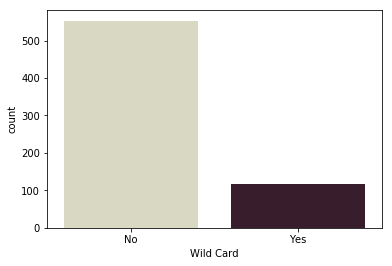

In [16]:
# Number of normal entries and wild card entries
print(bigg_boss['Wild Card'].value_counts(), "\n")
print(round(bigg_boss['Wild Card'].value_counts(normalize=True)*100))
sns.countplot(x='Wild Card', data=bigg_boss, palette="ch:.45")

In [17]:
# Common people has many professions, so clubbing them into one category
bigg_boss['Profession'] = bigg_boss['Profession'].fillna('UNKNOWN')
bigg_boss.loc[bigg_boss['Profession'].str.contains('Commoner'),'Profession']='Commoner'

## Number of film actresses entered into the Bigg Boss houses, are more when compared to other professions 

Actress                  155
Actor                    109
Model                     51
Soap Actress              48
Singer                    40
Commoner                  40
Soap Actor                29
TV Anchor                 21
Reality Show Alumni       17
Comedian                  16
Social Media Star         14
Radio Jockey              14
News Presenter            13
Sports Person              9
Choreographer              8
Film Director              8
Activist                   6
International Star         6
Producer                   5
Politician                 5
Swamiji                    4
Video Jockey               4
Dancer                     4
Pageant Winner             4
LGBT                       4
Controversial Fame         4
Wrestler                   3
Stage Actress              2
Fashion Designer           2
Businessman                2
Journalist                 2
Musician                   2
Celebrity Hairstylist      1
Author                     1
Lyricist      

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

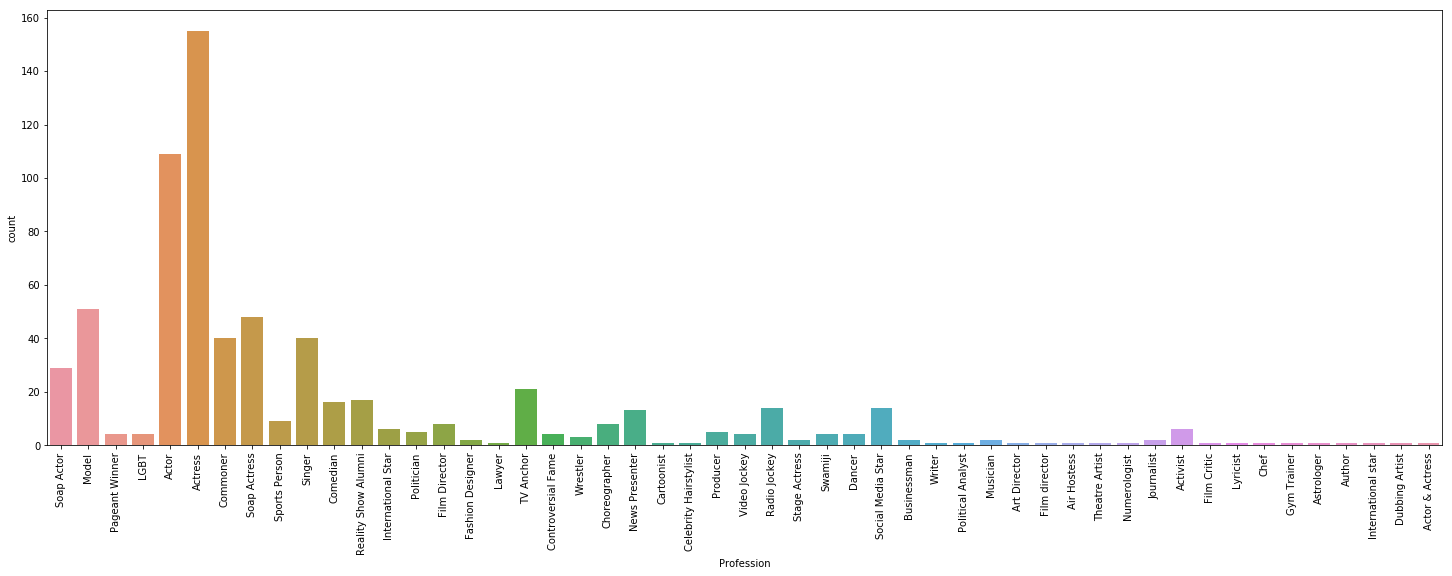

In [18]:
# Participant's Profession
print(bigg_boss['Profession'].value_counts())
fig = plt.figure(figsize=(25,8))
sns.countplot(x='Profession', data=bigg_boss)
plt.xticks(rotation=90)

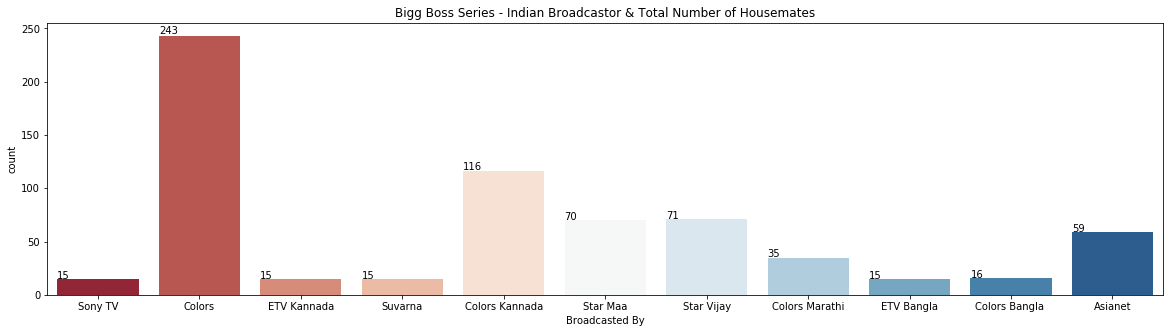

In [19]:
# Broadcastor
fig = plt.figure(figsize=(20,5))
ax = sns.countplot(x='Broadcasted By', data=bigg_boss, palette='RdBu')
ax.set_title('Bigg Boss Series - Indian Broadcastor & Total Number of Housemates')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

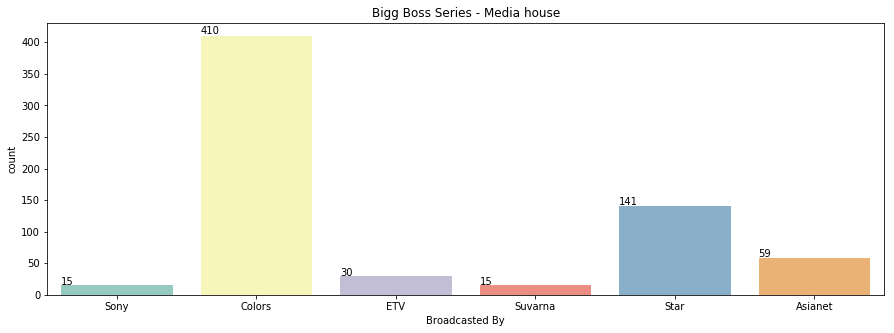

In [20]:
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(bigg_boss['Broadcasted By'].str.split().str.get(0), data=bigg_boss, palette='Set3')
ax.set_title('Bigg Boss Series - Media house')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

## Salman Khan hosted most number of seasons (in Bigg Boss Hindi), Sudeep is next on the list

In [21]:
# Bigg Boss main hosts and number of seasons they hosted
bigg_boss.groupby('Host Name')['Season Number'].nunique().nlargest(25)

Host Name
Salman Khan            11
Sudeep                  8
Kamal Haasan            4
Mohanlal                3
Mahesh Manjrekar        2
Mithun Chakraborthy     2
Nagarjuna               2
Amitabh Bachchan        1
Arshad Warsi            1
Jr. NTR                 1
Nani                    1
Shilpa Shetty           1
Name: Season Number, dtype: int64

In [22]:
# Temporary or Guest host who hosted the week-end episodes
bigg_boss.groupby('Guest Host Name')['Season Number'].nunique().nlargest(10)

Guest Host Name
Farah Khan           1
Ramya Krishnan       1
Samantha Akkineni    1
Sanjay Dutt          1
Name: Season Number, dtype: int64

## In all Bigg Boss competetions, in languages and in all seasons, Female contestants are more

In [23]:
# Housemate's Gender
print(bigg_boss['Gender'].value_counts(), "\n")

# In percentage
print(round(bigg_boss['Gender'].value_counts(normalize=True)*100).astype(int), "\n")

Female           352
Male             313
Transgender        4
Male & Female      1
Name: Gender, dtype: int64 

Female           53
Male             47
Transgender       1
Male & Female     0
Name: Gender, dtype: int64 



### Only 4 Transgenders (LGBT) participated in all Indian languages

In [24]:
# Maximum TRP of Bigg Boss India seasons
print("Maximum TRP",bigg_boss['Average TRP'].max(), "\n")
print(bigg_boss.loc[bigg_boss['Average TRP']==bigg_boss['Average TRP'].max()][["Language","Season Number"]].head(1).to_string(index=False))

Maximum TRP 15.6 

Language  Season Number
   Tamil              4


In [25]:
# Longest season of India Bigg Boss seasons
print("Longest season",bigg_boss['Season Length'].max(), "days \n")
print(bigg_boss.loc[bigg_boss['Season Length']==bigg_boss['Season Length'].max()][["Language","Season Number"]].head(1).to_string(index=False))

Longest season 143 days 

Language  Season Number
   Hindi             14


In [26]:
# Many contestants entered via wild card, but few managed to go to Finale
bigg_boss.loc[(bigg_boss['Wild Card']=='Yes') & (bigg_boss['Finalist']==1), :]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
44,Hindi,3,Pravesh Rana,Model,Male,NaT,NaT,12,Yes,84,15,2009-10-04,2009-12-26,Amitabh Bachchan,NaN,0.0,Colors,2.83,4,0,0,NaN,1,0.0
59,Hindi,4,Dalip Singh Rana (Khali),Wrestler,Male,NaT,2011-01-08,14,Yes,96,16,2010-10-03,2011-01-08,Salman Khan,NaN,0.0,Colors,4.95,2,0,2,NaN,1,0.0
60,Hindi,4,Dolly Bindra,Actress,Female,NaT,2011-01-08,14,Yes,96,16,2010-10-03,2011-01-08,Salman Khan,NaN,0.0,Colors,4.95,4,0,1,NaN,1,0.0
75,Hindi,5,Amar Upadhyay,Actor,Male,NaT,2012-01-07,14,Yes,98,18,2011-10-02,2012-01-07,Salman Khan,Sanjay Dutt,0.0,Colors,4.19,7,0,1,NaN,1,0.0
76,Hindi,5,Siddharth Bhardwaj,Reality Show Alumni,Male,NaT,2012-01-07,14,Yes,98,18,2011-10-02,2012-01-07,Salman Khan,Sanjay Dutt,0.0,Colors,4.19,5,0,0,NaN,1,0.0
77,Hindi,5,Akashdeep Saigal,Actor,Male,NaT,2012-01-07,14,Yes,98,18,2011-10-02,2012-01-07,Salman Khan,Sanjay Dutt,0.0,Colors,4.19,5,0,1,NaN,1,0.0
96,Hindi,6,Imam Siddique,Reality Show Alumni,Male,NaT,2013-01-12,14,Yes,97,19,2012-10-07,2013-01-12,Salman Khan,NaN,0.0,Colors,3.81,6,1,1,NaN,1,0.0
115,Hindi,7,Ajaz Khan,Actor,Male,NaT,2013-12-28,15,Yes,105,20,2013-09-15,2013-12-28,Salman Khan,NaN,0.0,Colors,4.40,7,0,0,NaN,1,0.0
133,Hindi,8,Ali Quli Mirza,Singer,Male,NaT,2015-01-03,15,Yes,105,19,2014-09-21,2015-01-03,Salman Khan,Farah Khan,0.0,Colors,3.77,6,0,1,NaN,1,0.0
135,Hindi,8,Dimpy Ganguly,TV Anchor,Female,NaT,2015-01-03,15,Yes,105,19,2014-09-21,2015-01-03,Salman Khan,Farah Khan,0.0,Colors,3.77,5,0,1,NaN,1,0.0


### About Winners only

In [27]:
# All BB Winners
bigg_boss.loc[bigg_boss.Winner==1]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
8,Hindi,1,Rahul Roy,Actor,Male,2006-11-03,NaT,NaN,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,NaN,10000000.0,Sony TV,2.72,4,0,0,NaN,1,1.0
16,Hindi,2,Ashutosh Kaushik,Reality Show Alumni,Male,2008-08-17,NaT,NaN,No,98,15,2008-08-17,2008-11-22,Shilpa Shetty,NaN,10000000.0,Colors,2.89,4,0,0,NaN,1,1.0
42,Hindi,3,Vindu Dara Singh,Actor,Male,2009-10-04,NaT,NaN,No,84,15,2009-10-04,2009-12-26,Amitabh Bachchan,NaN,10000000.0,Colors,2.83,7,0,0,NaN,1,1.0
57,Hindi,4,Shweta Tiwari,Soap Actress,Female,2010-10-03,NaT,NaN,No,96,16,2010-10-03,2011-01-08,Salman Khan,NaN,10000000.0,Colors,4.95,4,0,2,NaN,1,1.0
62,Hindi,5,Juhi Parmar,Soap Actress,Female,2011-10-02,NaT,NaN,No,98,18,2011-10-02,2012-01-07,Salman Khan,Sanjay Dutt,10000000.0,Colors,4.19,4,0,1,NaN,1,1.0
92,Hindi,6,Urvashi Dholakia,Soap Actress,Female,2012-10-07,NaT,NaN,No,97,19,2012-10-07,2013-01-12,Salman Khan,NaN,5000000.0,Colors,3.81,6,0,1,NaN,1,1.0
102,Hindi,7,Gauhar Khan,Actress,Female,2013-09-15,NaT,NaN,No,105,20,2013-09-15,2013-12-28,Salman Khan,NaN,5000000.0,Colors,4.40,7,0,2,NaN,1,1.0
121,Hindi,8,Gautam Gulati,Actor,Male,2014-09-21,NaT,NaN,No,105,19,2014-09-21,2015-01-03,Salman Khan,Farah Khan,5000000.0,Colors,3.77,10,0,1,NaN,1,1.0
144,Hindi,9,Prince Narula,Reality Show Alumni,Male,2015-10-11,NaT,NaN,No,105,20,2015-10-11,2016-01-23,Salman Khan,NaN,5000000.0,Colors,2.90,6,0,4,NaN,1,1.0
165,Hindi,10,Manveer Gurjar,Commoner,Male,2016-10-16,NaT,NaN,No,105,18,2016-10-16,2017-01-28,Salman Khan,NaN,5000000.0,Colors,3.54,7,0,4,8,1,1.0


In [28]:
# Sum of prize money won by all BB Season Winners, in India

from babel.numbers import format_currency
print(format_currency(bigg_boss['Prize Money (INR)'].sum(), 'INR', locale='en_IN'))

# 18 crores and 96 lakh rupees

₹ 18,96,00,000.00


In [29]:
# Profession of BB Season Winners
bigg_boss.loc[bigg_boss.Winner==1,'Profession'].value_counts()

Actor                  9
Actress                5
Soap Actress           5
Singer                 4
Reality Show Alumni    3
Commoner               2
TV Anchor              2
Soap Actor             2
Film Director          1
Model                  1
Name: Profession, dtype: int64

In [30]:
# Gender of Season title Winners
print(bigg_boss.loc[bigg_boss.Winner==1,'Gender'].value_counts(),'\n')

# In percentage
print(round(bigg_boss.loc[bigg_boss.Winner==1,'Gender'].value_counts(normalize=True)*100).astype(int))

Male      24
Female    10
Name: Gender, dtype: int64 

Male      71
Female    29
Name: Gender, dtype: int64


## No wild card entry housemate won the Bigg Boss competition.

In [31]:
# Entry type of the Season Winners
bigg_boss.loc[bigg_boss.Winner==1,'Wild Card'].value_counts()

No    34
Name: Wild Card, dtype: int64

In [32]:
# No re-entered contestant won Bigg Boss title
bigg_boss.loc[bigg_boss.Winner==1,'Number of re-entries'].value_counts()

0    33
Name: Number of re-entries, dtype: int64

In [33]:
# Number of eliminations or evictions faced by the Bigg Boss competition winners
bigg_boss.loc[bigg_boss.Winner==1,'Number of Evictions Faced'].value_counts().sort_index()

# Number of eliminations faced - Number of Winners

4     7
5     3
6     5
7     6
8     1
9     4
10    1
11    2
12    3
17    1
Name: Number of Evictions Faced, dtype: int64

In [34]:
# Bigg Boss winners Number of times elected as Captain
bigg_boss.loc[bigg_boss.Winner==1,'Number of times elected as Captain'].value_counts().sort_index()

# Number of times elected as Captain   - Number of winners

0     9
1     9
2    11
3     1
4     2
Name: Number of times elected as Captain, dtype: int64

## BB Malayalam Seasons

In [35]:
lang='Malayalam'

# All Bigg Boss Malayalam Participants
bigg_boss.loc[(bigg_boss['Language']==lang)]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
611,Malayalam,1,Aditi Rai,Actress,Female,2018-06-24,NaT,14,No,98,18,2018-06-24,2018-09-30,Mohanlal,NaN,0.0,Asianet,10.33,5,0,1,NaN,0,0.0
612,Malayalam,1,Anoop Chandran,Actor,Male,2018-06-24,NaT,10,No,98,18,2018-06-24,2018-09-30,Mohanlal,NaN,0.0,Asianet,10.33,4,0,1,NaN,0,0.0
613,Malayalam,1,Archana Suseelan,Actress,Female,2018-06-24,NaT,13,No,98,18,2018-06-24,2018-09-30,Mohanlal,NaN,0.0,Asianet,10.33,5,0,1,NaN,0,0.0
614,Malayalam,1,Aristo Suresh,Actor,Male,2018-06-24,NaT,14,No,98,18,2018-06-24,2018-09-30,Mohanlal,NaN,0.0,Asianet,10.33,7,0,1,NaN,1,0.0
615,Malayalam,1,Basheer Bashi,Actor,Male,2018-06-24,NaT,12,No,98,18,2018-06-24,2018-09-30,Mohanlal,NaN,0.0,Asianet,10.33,2,0,1,NaN,0,0.0
616,Malayalam,1,David John,Soap Actor,Male,2018-06-24,NaT,1,No,98,18,2018-06-24,2018-09-30,Mohanlal,NaN,0.0,Asianet,10.33,1,0,0,NaN,0,0.0
617,Malayalam,1,Deepan Murali,Soap Actor,Male,2018-06-24,NaT,4,No,98,18,2018-06-24,2018-09-30,Mohanlal,NaN,0.0,Asianet,10.33,2,0,0,NaN,0,0.0
618,Malayalam,1,Diya Sana,Activist,Female,2018-06-24,NaT,6,No,98,18,2018-06-24,2018-09-30,Mohanlal,NaN,0.0,Asianet,10.33,2,0,0,NaN,0,0.0
619,Malayalam,1,Hima Shankar,Actress,Female,2018-06-24,NaT,11,No,98,18,2018-06-24,2018-09-30,Mohanlal,NaN,0.0,Asianet,10.33,4,1,0,NaN,0,0.0
620,Malayalam,1,Manoj K. Verma,Businessman,Male,2018-06-24,NaT,NaN,No,98,18,2018-06-24,2018-09-30,Mohanlal,NaN,0.0,Asianet,10.33,0,0,0,NaN,0,0.0


In [36]:
# Bigg Boss Malayalam Winners
bigg_boss.loc[(bigg_boss['Language']==lang) & (bigg_boss['Winner']==1), :]

# Malayalam season 2 was abruptly stopped because of COVID, so no winner for that season

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
623,Malayalam,1,Sabumon Abdusamad,TV Anchor,Male,2018-06-24,NaT,NaN,No,98,18,2018-06-24,2018-09-30,Mohanlal,NaN,10000000.0,Asianet,10.33,5,0,1,NaN,1,1.0


In [37]:
# Bigg Boss Malayalam current season participants
bigg_boss.loc[(bigg_boss['Language']==lang) & (bigg_boss['Season Number']==3), :]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
652,Malayalam,3,Adoney John,Activist,Male,2021-02-14,NaT,11,No,105,19,2021-02-14,2021-05-31,Mohanlal,NaN,0.0,Asianet,NaN,3,0,1,NaN,0,0.0
653,Malayalam,3,Anoop Krishnan,Soap Actor,Male,2021-02-14,NaT,NaN,No,105,19,2021-02-14,2021-05-31,Mohanlal,NaN,NaN,Asianet,NaN,4,0,2,NaN,NaN,NaN
654,Malayalam,3,Bhagyalakshmi,Dubbing Artist,Female,2021-02-14,NaT,7,No,105,19,2021-02-14,2021-05-31,Mohanlal,NaN,0.0,Asianet,NaN,3,0,1,NaN,0,0.0
655,Malayalam,3,Dimpal Bhal,Social Media Star,Female,2021-02-14,NaT,NaN,No,105,19,2021-02-14,2021-05-31,Mohanlal,NaN,NaN,Asianet,NaN,6,0,0,NaN,NaN,NaN
656,Malayalam,3,Firoz Azeez,Radio Jockey,Male,2021-02-14,NaT,NaN,No,105,19,2021-02-14,2021-05-31,Mohanlal,NaN,NaN,Asianet,NaN,5,0,1,NaN,NaN,NaN
657,Malayalam,3,Lekshmi Jayan,Singer,Female,2021-02-14,NaT,2,No,105,19,2021-02-14,2021-05-31,Mohanlal,NaN,0.0,Asianet,NaN,1,0,0,NaN,0,0.0
658,Malayalam,3,Majiziya Bhanu,Sports Person,Female,2021-02-14,NaT,6,No,105,19,2021-02-14,2021-05-31,Mohanlal,NaN,0.0,Asianet,NaN,2,0,0,NaN,0,0.0
659,Malayalam,3,Manikuttan,Actor,Male,2021-02-14,NaT,NaN,No,105,19,2021-02-14,2021-05-31,Mohanlal,NaN,NaN,Asianet,NaN,4,0,2,NaN,NaN,NaN
660,Malayalam,3,Noby Marcose,Actor,Male,2021-02-14,NaT,NaN,No,105,19,2021-02-14,2021-05-31,Mohanlal,NaN,NaN,Asianet,NaN,1,0,1,NaN,NaN,NaN
661,Malayalam,3,Ramzan Muhammed,Dancer,Male,2021-02-14,NaT,NaN,No,105,19,2021-02-14,2021-05-31,Mohanlal,NaN,NaN,Asianet,NaN,4,0,2,NaN,NaN,NaN


## Preparing Data for ML modelling

In [38]:
# Handling NULL values
bigg_boss.isnull().sum()

Language                                0
Season Number                           0
Name                                    0
Profession                              0
Gender                                  0
Entry Date                            106
Elimination Date                      536
Elimination Week Number               120
Wild Card                               0
Season Length                           0
Number of Housemates                    0
Season Start Date                       0
Season End Date                         0
Host Name                               0
Guest Host Name                       597
Prize Money (INR)                      20
Broadcasted By                          0
Average TRP                           276
Number of Evictions Faced              18
Number of re-entries                   18
Number of times elected as Captain     33
Social Media Popularity               584
Finalist                               20
Winner                            

In [39]:
# Removing records where Name field is empty
bigg_boss = bigg_boss.loc[bigg_boss.Name.notnull()]
bigg_boss.reset_index(drop=True,inplace=True)

In [40]:
# Contestant might have faced at least one eviction, so filling NaN with 'Number of Evictions Faced' with 1
bigg_boss['Number of Evictions Faced'] = bigg_boss['Number of Evictions Faced'].fillna(1)

# Number of re-entries are very less, so filling NULLs in 'Number of re-entries' with 0
bigg_boss['Number of re-entries'] = bigg_boss['Number of re-entries'].fillna(0)

# Filling blank values in 'Average TRP' column with average
bigg_boss['Average TRP'] = bigg_boss['Average TRP'].fillna(bigg_boss['Average TRP'].mean())

# Filling NULLs in 'Number of times elected as Captain' with 0
bigg_boss['Number of times elected as Captain'] = bigg_boss['Number of times elected as Captain'].fillna(0)

In [41]:
bigg_boss['Season Starting Year'] = bigg_boss['Season Start Date'].dt.year.astype(pd.Int32Dtype())
bigg_boss['Season Ending Year'] = bigg_boss['Season End Date'].dt.year.astype(pd.Int32Dtype())
bigg_boss['Season Starting Quarter'] = bigg_boss['Season Start Date'].dt.quarter.astype(pd.Int32Dtype())
bigg_boss['Season Ending Quarter'] = bigg_boss['Season End Date'].dt.quarter.astype(pd.Int32Dtype())
bigg_boss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 28 columns):
Language                              670 non-null object
Season Number                         670 non-null int64
Name                                  670 non-null object
Profession                            670 non-null object
Gender                                670 non-null object
Entry Date                            564 non-null datetime64[ns]
Elimination Date                      134 non-null datetime64[ns]
Elimination Week Number               550 non-null Int32
Wild Card                             670 non-null object
Season Length                         670 non-null int64
Number of Housemates                  670 non-null int64
Season Start Date                     670 non-null datetime64[ns]
Season End Date                       670 non-null datetime64[ns]
Host Name                             670 non-null object
Guest Host Name                       73 non-null objec

In [42]:
bigg_boss.head()

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner,Season Starting Year,Season Ending Year,Season Starting Quarter,Season Ending Quarter
0,Hindi,1,Amit Sadh,Soap Actor,Male,2006-11-03,NaT,10,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,NaN,0.0,Sony TV,2.72,3,0,0,NaN,0,0.0,2006,2007,4,1
1,Hindi,1,Anupama Verma,Model,Female,2006-11-03,NaT,5,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,NaN,0.0,Sony TV,2.72,1,0,0,NaN,0,0.0,2006,2007,4,1
2,Hindi,1,Aryan Vaid,Pageant Winner,Male,2006-11-03,NaT,4,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,NaN,0.0,Sony TV,2.72,1,0,0,NaN,0,0.0,2006,2007,4,1
3,Hindi,1,Bobby Darling,LGBT,Transgender,2006-11-03,NaT,1,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,NaN,0.0,Sony TV,2.72,1,0,0,NaN,0,0.0,2006,2007,4,1
4,Hindi,1,Carol Gracias,Model,Female,2006-11-03,2007-01-26,12,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,NaN,0.0,Sony TV,2.72,6,0,0,NaN,1,0.0,2006,2007,4,1


In [43]:
bigg_boss.tail()

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner,Season Starting Year,Season Ending Year,Season Starting Quarter,Season Ending Quarter
665,Malayalam,3,Soorya Menon,Model,Female,2021-02-14,NaT,13,No,105,19,2021-02-14,2021-05-31,Mohanlal,NaN,0.0,Asianet,6.230635,8,0,1,NaN,0,0.0,2021,2021,1,2
666,Malayalam,3,Firoz Khan & Sajna Firoz,Actor & Actress,Male & Female,NaT,NaT,9,Yes,105,19,2021-02-14,2021-05-31,Mohanlal,NaN,0.0,Asianet,6.230635,7,0,0,NaN,0,0.0,2021,2021,1,2
667,Malayalam,3,Michelle Ann Daniel,Actress,Female,NaT,NaT,3,Yes,105,19,2021-02-14,2021-05-31,Mohanlal,NaN,0.0,Asianet,6.230635,1,0,0,NaN,0,0.0,2021,2021,1,2
668,Malayalam,3,Angel Thomas,Model,Female,NaT,NaT,4,Yes,105,19,2021-02-14,2021-05-31,Mohanlal,NaN,0.0,Asianet,6.230635,1,0,0,NaN,0,0.0,2021,2021,1,2
669,Malayalam,3,Remya Panickar,Actress,Female,NaT,NaT,13,Yes,105,19,2021-02-14,2021-05-31,Mohanlal,NaN,0.0,Asianet,6.230635,3,1,1,NaN,0,0.0,2021,2021,1,2


In [44]:
# Updating last week-end elimination/entries manually
#bigg_boss.iloc[664,24] = 0

In [45]:
train = bigg_boss.loc[(bigg_boss['Winner'].notnull()), :]
train.sample(10)

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner,Season Starting Year,Season Ending Year,Season Starting Quarter,Season Ending Quarter
185,Hindi,11,Priyank Sharma,Model,Male,2017-10-01,NaT,13,No,106,19,2017-10-01,2018-01-14,Salman Khan,NaN,0.0,Colors,7.640000,8,1,0,NaN,0,0.0,2017,2018,4,1
577,Marathi,2,Vidyadhar (Bappa) Joshi,Actor,Male,2019-05-26,NaT,4,No,98,17,2019-05-26,2019-09-01,Mahesh Manjrekar,NaN,0.0,Colors Marathi,6.230635,1,0,0,NaN,0,0.0,2019,2019,2,3
479,Tamil,1,Gayathri Raghuram,Choreographer,Female,2017-06-25,NaT,8,No,98,19,2017-06-25,2017-09-30,Kamal Haasan,NaN,0.0,Star Vijay,7.800000,3,0,1,NaN,0,0.0,2017,2017,2,3
426,Telugu,2,Geetha Madhuri,Singer,Female,2018-06-10,2018-09-30,16,No,112,18,2018-06-10,2018-09-30,Nani,NaN,0.0,Star Maa,6.230635,7,0,2,8,1,0.0,2018,2018,2,3
420,Telugu,2,Amit Tiwari,Actor,Male,2018-06-10,NaT,14,No,112,18,2018-06-10,2018-09-30,Nani,NaN,0.0,Star Maa,6.230635,4,0,1,NaN,0,0.0,2018,2018,2,3
544,Tamil,4,Suchitra Ramadurai,Singer,Female,NaT,NaT,7,Yes,105,18,2020-10-04,2021-01-17,Kamal Haasan,NaN,0.0,Star Vijay,15.600000,1,0,0,NaN,0,0.0,2020,2021,4,1
446,Telugu,3,Rahul Sipligunj,Singer,Male,2019-07-21,NaT,NaN,No,105,17,2019-07-21,2019-11-03,Nagarjuna,Ramya Krishnan,5000000.0,Star Maa,6.230635,12,0,0,9,1,1.0,2019,2019,3,4
450,Telugu,3,Sreemukhi,TV Anchor,Female,2019-07-21,2019-11-03,15,No,105,17,2019-07-21,2019-11-03,Nagarjuna,Ramya Krishnan,0.0,Star Maa,6.230635,7,0,1,9,1,0.0,2019,2019,3,4
301,Kannada,3,Shruti,Actress,Female,2015-10-25,NaT,NaN,No,98,18,2015-10-25,2016-01-31,Sudeep,NaN,5000000.0,Colors Kannada,6.230635,6,0,3,NaN,1,1.0,2015,2016,4,1
632,Malayalam,2,Krishnajeev/Fukru,Social Media Star,Male,2020-01-05,NaT,NaN,No,75,23,2020-01-05,2020-03-20,Mohanlal,NaN,0.0,Asianet,11.030000,2,0,3,NaN,0,0.0,2020,2020,1,1


In [46]:
test = bigg_boss.loc[(bigg_boss['Language']==lang) & (bigg_boss['Winner'].isnull()), :]
test

# Participants who are still in current Bigg Boss Malayalam season

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner,Season Starting Year,Season Ending Year,Season Starting Quarter,Season Ending Quarter
653,Malayalam,3,Anoop Krishnan,Soap Actor,Male,2021-02-14,NaT,NaN,No,105,19,2021-02-14,2021-05-31,Mohanlal,NaN,NaN,Asianet,6.230635,4,0,2,NaN,NaN,NaN,2021,2021,1,2
655,Malayalam,3,Dimpal Bhal,Social Media Star,Female,2021-02-14,NaT,NaN,No,105,19,2021-02-14,2021-05-31,Mohanlal,NaN,NaN,Asianet,6.230635,6,0,0,NaN,NaN,NaN,2021,2021,1,2
656,Malayalam,3,Firoz Azeez,Radio Jockey,Male,2021-02-14,NaT,NaN,No,105,19,2021-02-14,2021-05-31,Mohanlal,NaN,NaN,Asianet,6.230635,5,0,1,NaN,NaN,NaN,2021,2021,1,2
659,Malayalam,3,Manikuttan,Actor,Male,2021-02-14,NaT,NaN,No,105,19,2021-02-14,2021-05-31,Mohanlal,NaN,NaN,Asianet,6.230635,4,0,2,NaN,NaN,NaN,2021,2021,1,2
660,Malayalam,3,Noby Marcose,Actor,Male,2021-02-14,NaT,NaN,No,105,19,2021-02-14,2021-05-31,Mohanlal,NaN,NaN,Asianet,6.230635,1,0,1,NaN,NaN,NaN,2021,2021,1,2
661,Malayalam,3,Ramzan Muhammed,Dancer,Male,2021-02-14,NaT,NaN,No,105,19,2021-02-14,2021-05-31,Mohanlal,NaN,NaN,Asianet,6.230635,4,0,2,NaN,NaN,NaN,2021,2021,1,2
662,Malayalam,3,Rithu Manthra,Singer,Female,2021-02-14,NaT,NaN,No,105,19,2021-02-14,2021-05-31,Mohanlal,NaN,NaN,Asianet,6.230635,8,0,0,NaN,NaN,NaN,2021,2021,1,2
663,Malayalam,3,Sai Vishnu,Commoner,Male,2021-02-14,NaT,NaN,No,105,19,2021-02-14,2021-05-31,Mohanlal,NaN,NaN,Asianet,6.230635,11,0,1,NaN,NaN,NaN,2021,2021,1,2


In [47]:
BB_Malayalam_participants = test[['Name']]
BB_Malayalam_participants.reset_index(drop=True, inplace=True)
BB_Malayalam_participants

,Name
0,Anoop Krishnan
1,Dimpal Bhal
2,Firoz Azeez
3,Manikuttan
4,Noby Marcose
5,Ramzan Muhammed
6,Rithu Manthra
7,Sai Vishnu


In [48]:
train.drop(["Name","Entry Date","Elimination Date","Season Start Date","Season End Date"], axis=1, inplace=True)
test.drop(["Name","Entry Date","Elimination Date","Season Start Date","Season End Date","Winner"], axis=1, inplace=True)

In [49]:
train.head()

,Language,Season Number,Profession,Gender,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner,Season Starting Year,Season Ending Year,Season Starting Quarter,Season Ending Quarter
0,Hindi,1,Soap Actor,Male,10,No,86,15,Arshad Warsi,NaN,0.0,Sony TV,2.72,3,0,0,NaN,0,0.0,2006,2007,4,1
1,Hindi,1,Model,Female,5,No,86,15,Arshad Warsi,NaN,0.0,Sony TV,2.72,1,0,0,NaN,0,0.0,2006,2007,4,1
2,Hindi,1,Pageant Winner,Male,4,No,86,15,Arshad Warsi,NaN,0.0,Sony TV,2.72,1,0,0,NaN,0,0.0,2006,2007,4,1
3,Hindi,1,LGBT,Transgender,1,No,86,15,Arshad Warsi,NaN,0.0,Sony TV,2.72,1,0,0,NaN,0,0.0,2006,2007,4,1
4,Hindi,1,Model,Female,12,No,86,15,Arshad Warsi,NaN,0.0,Sony TV,2.72,6,0,0,NaN,1,0.0,2006,2007,4,1


In [50]:
test.head(17)

,Language,Season Number,Profession,Gender,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Season Starting Year,Season Ending Year,Season Starting Quarter,Season Ending Quarter
653,Malayalam,3,Soap Actor,Male,NaN,No,105,19,Mohanlal,NaN,NaN,Asianet,6.230635,4,0,2,NaN,NaN,2021,2021,1,2
655,Malayalam,3,Social Media Star,Female,NaN,No,105,19,Mohanlal,NaN,NaN,Asianet,6.230635,6,0,0,NaN,NaN,2021,2021,1,2
656,Malayalam,3,Radio Jockey,Male,NaN,No,105,19,Mohanlal,NaN,NaN,Asianet,6.230635,5,0,1,NaN,NaN,2021,2021,1,2
659,Malayalam,3,Actor,Male,NaN,No,105,19,Mohanlal,NaN,NaN,Asianet,6.230635,4,0,2,NaN,NaN,2021,2021,1,2
660,Malayalam,3,Actor,Male,NaN,No,105,19,Mohanlal,NaN,NaN,Asianet,6.230635,1,0,1,NaN,NaN,2021,2021,1,2
661,Malayalam,3,Dancer,Male,NaN,No,105,19,Mohanlal,NaN,NaN,Asianet,6.230635,4,0,2,NaN,NaN,2021,2021,1,2
662,Malayalam,3,Singer,Female,NaN,No,105,19,Mohanlal,NaN,NaN,Asianet,6.230635,8,0,0,NaN,NaN,2021,2021,1,2
663,Malayalam,3,Commoner,Male,NaN,No,105,19,Mohanlal,NaN,NaN,Asianet,6.230635,11,0,1,NaN,NaN,2021,2021,1,2


In [51]:
# Spread of target variable
print(train['Winner'].value_counts(normalize=True)*100)

0.0    94.769231
1.0     5.230769
Name: Winner, dtype: float64


In [52]:
# One Hot Encoding

target = train.pop('Winner')
data = pd.concat([train, test])
dummies = pd.get_dummies(data, columns=data.columns, drop_first=True, sparse=True)
train2 = dummies.iloc[:train.shape[0], :]
test = dummies.iloc[train.shape[0]:, :]

In [53]:
print(train2.shape)
print(test.shape)

(650, 230)
(8, 230)


In [54]:
train2.isnull().sum().sort_values(ascending=False)

Season Ending Quarter_4       0
Elimination Week Number_15    0
Elimination Week Number_13    0
Elimination Week Number_12    0
Elimination Week Number_11    0
                             ..
Average TRP_3.77              0
Average TRP_3.54              0
Average TRP_2.9               0
Average TRP_2.89              0
Language_Hindi                0
Length: 230, dtype: int64

In [55]:
train2.drop(["Profession_Dubbing Artist"], axis=1, inplace=True)
test.drop(["Profession_Dubbing Artist"], axis=1, inplace=True)

In [56]:
train2.head()

,Language_Hindi,Language_Kannada,Language_Malayalam,Language_Marathi,Language_Tamil,Language_Telugu,Season Number_2,Season Number_3,Season Number_4,Season Number_5,Season Number_6,Season Number_7,Season Number_8,Season Number_9,Season Number_10,Season Number_11,Season Number_12,Season Number_13,Season Number_14,Profession_Actor,Profession_Actor & Actress,Profession_Actress,Profession_Air Hostess,Profession_Art Director,Profession_Astrologer,...,Season Starting Year_2016,Season Starting Year_2017,Season Starting Year_2018,Season Starting Year_2019,Season Starting Year_2020,Season Starting Year_2021,Season Ending Year_2008,Season Ending Year_2009,Season Ending Year_2011,Season Ending Year_2012,Season Ending Year_2013,Season Ending Year_2014,Season Ending Year_2015,Season Ending Year_2016,Season Ending Year_2017,Season Ending Year_2018,Season Ending Year_2019,Season Ending Year_2020,Season Ending Year_2021,Season Starting Quarter_2,Season Starting Quarter_3,Season Starting Quarter_4,Season Ending Quarter_2,Season Ending Quarter_3,Season Ending Quarter_4
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [57]:
target.values

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1.

In [58]:
x_train, x_val, y_train, y_val = train_test_split(train2, target, test_size=0.3, random_state=2021)
print(x_train.shape, x_val.shape)

(455, 229) (195, 229)


In [59]:
x_train.isnull().sum().sort_values(ascending=False)

Season Ending Quarter_4       0
Elimination Week Number_15    0
Elimination Week Number_13    0
Elimination Week Number_12    0
Elimination Week Number_11    0
                             ..
Average TRP_3.77              0
Average TRP_3.54              0
Average TRP_2.9               0
Average TRP_2.89              0
Language_Hindi                0
Length: 229, dtype: int64

## Machine Learning Modelling

In [60]:
def plot_confusion_matrix():
    cm = confusion_matrix(y_val, y_predicted_val).T
    cm = cm.astype('float')/cm.sum(axis=0)
    ax = sns.heatmap(cm, annot=True, cmap='Blues');
    ax.set_xlabel('True Label',size=12)
    ax.set_ylabel('Predicted Label',size=12)

In [61]:
# Logistic Regression
for c in [0.01, 1, 10, 100, 1000]:
    lr = LogisticRegression(random_state=2021, C=c).fit(x_train, y_train)
    print ("F1 score for C=%s: %s" % (c, f1_score(y_val, lr.predict(x_val), average='weighted')*100))

F1 score for C=0.01: 93.88911263256813
F1 score for C=1: 97.6176909510243
F1 score for C=10: 97.6176909510243
F1 score for C=100: 98.90382666978414
F1 score for C=1000: 98.90382666978414


In [62]:
logi = LogisticRegression(random_state=2021,C=100).fit(x_train, y_train)
logi

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=2021, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
predicted_val_logi = logi.predict_proba(x_val)[:, 1]
y_predicted_val = (predicted_val_logi > 0.3).astype("int").ravel()
print('F1 Score -',f1_score(y_val, y_predicted_val, average='weighted')*100)
print('Accuracy Score -',accuracy_score(y_val, y_predicted_val)*100)

F1 Score - 98.90382666978414
Accuracy Score - 98.97435897435898


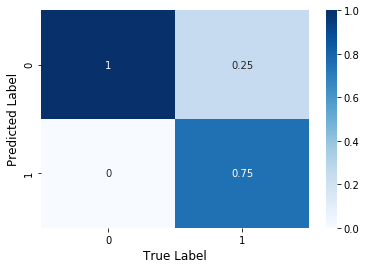

In [64]:
# Confusion Matrix
plot_confusion_matrix()

# TP 1 TN 1

In [65]:
predicted_val_logi = logi.predict_proba(test)[:, 1]
winner_lg = pd.concat([BB_Malayalam_participants, pd.DataFrame(predicted_val_logi, columns=['Predicted_Winner'])],axis=1)
winner_lg.sort_values('Predicted_Winner', ascending=False)

,Name,Predicted_Winner
0,Anoop Krishnan,0.006183
5,Ramzan Muhammed,0.002328
6,Rithu Manthra,0.001383
3,Manikuttan,0.000992
1,Dimpal Bhal,0.000475
2,Firoz Azeez,0.000243
7,Sai Vishnu,0.000053
4,Noby Marcose,0.000023


## Predicted Winner for Bigg Boss Malayalam Season 3, as per Logistic Regression

In [66]:
# Predicted Winner for Bigg Boss Malayalam Season 3, as per LogisticRegression
winner_lg.iloc[np.argwhere(winner_lg.Predicted_Winner == np.amax(winner_lg.Predicted_Winner)).flatten().tolist()]

,Name,Predicted_Winner
0,Anoop Krishnan,0.006183


In [67]:
# RandomForest
rf = RandomForestClassifier(n_estimators=1000, random_state=2021).fit(x_train, y_train)
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=2021,
                       verbose=0, warm_start=False)

In [68]:
predicted_val_rf = rf.predict_proba(x_val)[:, 1]
y_predicted_val = (predicted_val_rf > 0.3).astype("int").ravel()
print('F1 Score -',f1_score(y_val, y_predicted_val, average='weighted')*100)
print('Accuracy Score -',accuracy_score(y_val, y_predicted_val)*100)

# n_estimators=100, F1 score 100 accuracy 100

F1 Score - 99.47076923076924
Accuracy Score - 99.48717948717949


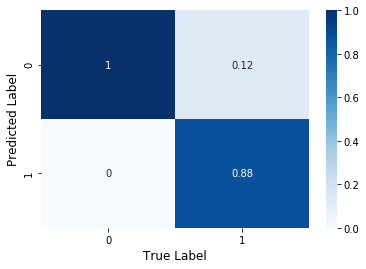

In [69]:
# Confusion Matrix
plot_confusion_matrix()

# TP 1 TN 1

In [70]:
predicted_val_rf = rf.predict_proba(test)[:,1]
winner_rf = pd.concat([BB_Malayalam_participants, pd.DataFrame(predicted_val_rf, columns=['Predicted_Winner'])],axis=1)
winner_rf.sort_values('Predicted_Winner', ascending=False)

,Name,Predicted_Winner
0,Anoop Krishnan,0.026
5,Ramzan Muhammed,0.016
3,Manikuttan,0.015
7,Sai Vishnu,0.012
2,Firoz Azeez,0.008
4,Noby Marcose,0.003
1,Dimpal Bhal,0.002
6,Rithu Manthra,0.002


## Predicted Winner for Bigg Boss Malayalam Season 3, as per Random Forest

In [71]:
# Predicted Winner for Bigg Boss Malayalam Season 3, as per RandomForest
winner_rf.iloc[np.argwhere(winner_rf.Predicted_Winner == np.amax(winner_rf.Predicted_Winner)).flatten().tolist()]

,Name,Predicted_Winner
0,Anoop Krishnan,0.026
